In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation

In [9]:
import math

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

### Carga de los datos:

In [12]:
name_f="international-airline-passengers.csv"

In [13]:
dataframe = pd.read_csv(name_f, sep=',', usecols=[1], engine='python', skipfooter=3)
dataframe[:] = dataframe[:].astype('float32') 
df_train, df_test = dataframe[0:96].values, dataframe[96:].values

Escalamiento de los datos:

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(df_train)
stream_train_scaled = scaler.transform(df_train)
stream_test_scaled = scaler.transform(df_test)

In [15]:
def create_dataset(dataset,lag=1):
    t_data = len(dataset)
    dataset = dataset.reshape(t_data)
    dataY = dataset[lag:]
    t_dataY = len(dataY)
    dataX = np.zeros((t_dataY, lag))
    for i in range(t_dataY):
        dataX[i] = dataset[i:lag+i]
    return np.array(dataX),np.array(dataY)

**(i) Compare el desempeñ de la red LSTM variando el lag de 1 a 4. Comente brevemente.**

In [16]:
def createModelo(_lag,_block):
    model = Sequential()
    model.add(LSTM(10, input_dim=_lag, activation='tanh', inner_activation='sigmoid'))
    model.add(Dense(1))
    return model

De la experiencia anterior obtuvimos que el mejor resultado para el numero de bloks es 10, ahora debemos experimentar con el número de pasos de tiempo anteriores para usar como variables de entrada para predecir el siguiente período de tiempo, probaremos con valores de lag = [1-2-3-4]

### Crear Modelos los 4 modelos [1-2-3-4]

In [17]:
lag_1 = 1
block = 10
model_1 = createModelo(lag_1,block)
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [24]:
lag_2 = 2
block = 10
model_2 = createModelo(lag_2,block)
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [25]:
lag_3 = 3
block = 10
model_3 = createModelo(lag_3,block)
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10)                560       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [26]:
lag_4 = 4
block = 10
model_4 = createModelo(lag_4,block)
model_4.compile(loss='mean_squared_error', optimizer='adam')
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 10)                600       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


### Fit Modelos

Train Score: 22.79 RMSE
Test Score: 56.02 RMSE


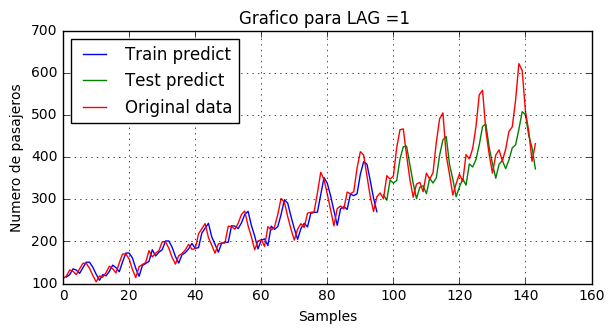

CPU times: user 48.3 s, sys: 39.8 s, total: 1min 28s
Wall time: 38.3 s


In [23]:
%%time
trainX, trainY = create_dataset(stream_train_scaled, lag_1)
testX, testY = create_dataset(stream_test_scaled, lag_1)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
history_caso_1 = model_1.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)
trainPredict = model_1.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = model_1.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag_1:len(trainPredict)+lag_1, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag_1):, :] = testPredict
plt.figure(figsize=(15, 15))
#####
plt.subplot(4, 2, 1)
plt.plot(trainPredictPlot) 
plt.plot(testPredictPlot)
plt.plot(dataframe)
plt.title('Grafico para LAG =1 ')  
plt.ylabel('Numero de pasajeros')  
plt.xlabel('Samples')  
plt.legend(['Train predict', 'Test predict', 'Original data'], loc='upper left')
plt.grid(True)
plt.show()

Train Score: 21.56 RMSE
Test Score: 61.75 RMSE


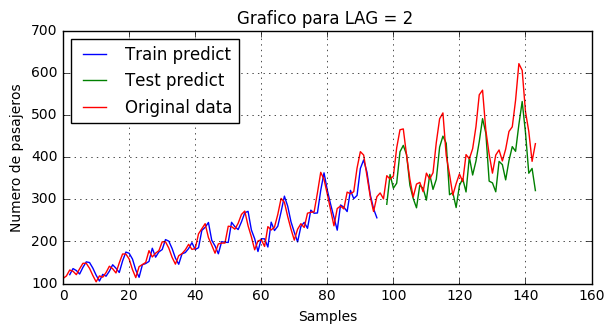

CPU times: user 51.6 s, sys: 41.5 s, total: 1min 33s
Wall time: 40.8 s


In [28]:
%%time
trainX, trainY = create_dataset(stream_train_scaled, lag_2)
testX, testY = create_dataset(stream_test_scaled, lag_2)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
history_caso_2 = model_2.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)
trainPredict = model_2.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = model_2.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag_2:len(trainPredict)+lag_2, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag_2):, :] = testPredict
plt.figure(figsize=(15, 15))
#####
plt.subplot(4, 2, 1)
plt.plot(trainPredictPlot) 
plt.plot(testPredictPlot)
plt.plot(dataframe)
plt.title('Grafico para LAG = 2 ')  
plt.ylabel('Numero de pasajeros')  
plt.xlabel('Samples')  
plt.legend(['Train predict', 'Test predict', 'Original data'], loc='upper left')
plt.grid(True)
plt.show()

Train Score: 21.31 RMSE
Test Score: 54.33 RMSE


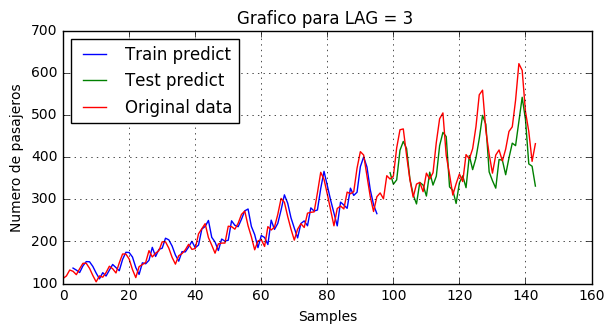

CPU times: user 51.8 s, sys: 39.9 s, total: 1min 31s
Wall time: 41.1 s


In [29]:
%%time
trainX, trainY = create_dataset(stream_train_scaled, lag_3)
testX, testY = create_dataset(stream_test_scaled, lag_3)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
history_caso_3 = model_3.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)
trainPredict = model_3.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = model_3.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag_3:len(trainPredict)+lag_3, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag_3):, :] = testPredict
plt.figure(figsize=(15, 15))
#####
plt.subplot(4, 2, 1)
plt.plot(trainPredictPlot) 
plt.plot(testPredictPlot)
plt.plot(dataframe)
plt.title('Grafico para LAG = 3 ')  
plt.ylabel('Numero de pasajeros')  
plt.xlabel('Samples')  
plt.legend(['Train predict', 'Test predict', 'Original data'], loc='upper left')
plt.grid(True)
plt.show()

Train Score: 21.91 RMSE
Test Score: 63.87 RMSE


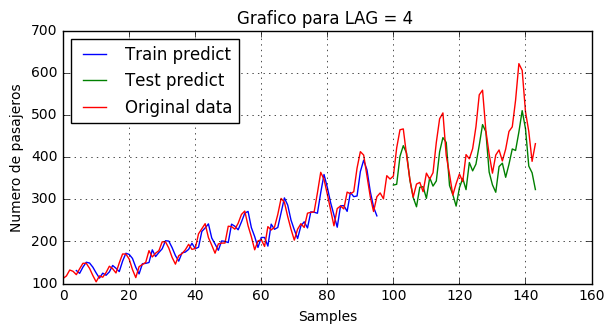

CPU times: user 51 s, sys: 39.2 s, total: 1min 30s
Wall time: 40.2 s


In [30]:
%%time
trainX, trainY = create_dataset(stream_train_scaled, lag_4)
testX, testY = create_dataset(stream_test_scaled, lag_4)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
history_caso_4 = model_4.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=0)
trainPredict = model_4.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = model_4.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag_4:len(trainPredict)+lag_4, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag_4):, :] = testPredict
plt.figure(figsize=(15, 15))
#####
plt.subplot(4, 2, 1)
plt.plot(trainPredictPlot) 
plt.plot(testPredictPlot)
plt.plot(dataframe)
plt.title('Grafico para LAG = 4 ')  
plt.ylabel('Numero de pasajeros')  
plt.xlabel('Samples')  
plt.legend(['Train predict', 'Test predict', 'Original data'], loc='upper left')
plt.grid(True)
plt.show()

### Comentarios
---

<h3 align = 'center'> Variables </h3>

|lag | block|  Total params | time_traning |Train_RMSE|Test_RMSE
| :-: | :-: | :-: | :-: | :-: |:-: |:-: |:-: |
|1|10|491| 38.3 s| 22.79| 56.02|
|2|10|531| 40.8 s| 21.56| 61.75|
|3|10|571| 41.1 s| 21.31| 54.33|
|4|10|611| 40.2 s| 21.91| 63.87|

En los resultados podemos comprobar que hubo una mejora en los RMSE con la incorporación del numero de bloque adecuado obtenido experimentalmente en a actividad anterior, pero aun existe un problema de overfiting y los resultados de obtenidos por un lag de 3 presentar una mejor correlación el numero de pasajeros predecido con el real, ademas de tener menor RMSE.